# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import seaborn as sns
import json
import matplotlib.pyplot as plt

### Reading dataset and printing first two rows

In [2]:
df_twitter_archive =  pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Gathering image prediction file on udacity hosted server 

Using python request --

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image_predictions.tsv', 'wb').write(response.content)

335079

In [12]:
df_image_prediction = pd.read_csv('image_predictions.tsv',sep='\t')
df_image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Stop running from here api call ahead will take 30-40 mins .

### Gathering twitter data throught tweepy : 

In [ ]:
CONSUMER_KEY = '5Uur0mo4ol2kB8yhtZ1VxXS0u'
CONSUMER_SECRET = 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH'
OAUTH_TOKEN = 'ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB'
OAUTH_TOKEN_SECRET ='D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft'


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


#Download Tweepy status object based on Tweet ID and store in list
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for each_id in my_ids:   
    try:
        list_of_tweets.append(api.get_status(each_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(each_id)

In [ ]:
# check data in list : 

print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

In [ ]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [ ]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [ ]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt',encoding ='utf-8') as json_file:
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
        my_demo_list.append({
            'tweet_id' : str(tweet_id),
            'favorite_count' : int(favorite_count),
            'retweet_count' : int(retweet_count),
            'followers_count' : int(followers_count),
            'friends_count' : int(friends_count),
            'source' : source,
            'retweeted_status' : retweeted_status,
            'url' : url,
            
        })
tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count','followers_count', 'friends_count','source','retweeted_status', 'url'])

## Start Running from here now : 

In [3]:
tweet_json = pd.read_csv('tweet_json.csv')
tweet_json.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34700,7246,8998089,19,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30063,5428,8998089,19,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L


#### Saving dataframe tweet_json to a csv file so that you dont have to run api call again when you rerun the code : 

In [4]:
tweet_json.to_csv('tweet_json.csv',index=False)

## Assesing data for issues : 
#### Visual assesment / Programatic assesment

## Assessing tweet_json data

In [5]:
tweet_json.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34700,7246,8998089,19,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30063,5428,8998089,19,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L


In [6]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   int64 
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.8+ KB


In [7]:
tweet_json.describe()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7.419079e+17,7245.987559,2556.085371,8.998094e+06,19.0
std,6.823170e+16,11254.881617,4323.846386,4.295674e+01,0.0
min,6.660209e+17,0.000000,1.000000,8.998088e+06,19.0
25%,6.782670e+17,1256.000000,518.000000,8.998088e+06,19.0
50%,7.182469e+17,3139.000000,1189.000000,8.998089e+06,19.0
75%,7.986692e+17,8856.500000,2965.500000,8.998091e+06,19.0
max,8.924206e+17,148962.000000,73274.000000,8.998485e+06,19.0


In [8]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1468,692828166163931137,2741,837,8998089,19,Twitter for iPhone,Original tweet,https://t.co/X6X9wM7NuS
47,882992080364220416,21542,3337,8998088,19,Twitter for iPhone,Original tweet,https://t.co/tyER0KpdXj
149,861383897657036800,33185,9594,8998088,19,Twitter for iPhone,Original tweet,https://t.co/QFRlbZw4Z1
1911,673956914389192708,1812,874,8998091,19,Twitter for iPhone,Original tweet,https://t.co/nyReCVRiyd
311,833863086058651648,12968,2287,8998088,19,Twitter for iPhone,Original tweet,https://t.co/HDloTYilWZ


In [9]:
sum(tweet_json.duplicated())

0

## Assesing image prediction data 

In [13]:
df_image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [14]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df_image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
176,669203728096960512,https://pbs.twimg.com/media/CUl9PGBVEAUV3Wz.jpg,1,pug,0.910452,True,French_bulldog,0.055090,True,Chihuahua,0.014897,True
1861,842535590457499648,https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg,1,Pembroke,0.685084,True,Cardigan,0.314608,True,basenji,0.000160,True
1999,875747767867523072,https://pbs.twimg.com/media/DCdH8YpUQAAiEbL.jpg,1,Labrador_retriever,0.799551,True,Chesapeake_Bay_retriever,0.179975,True,vizsla,0.004618,True
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True
640,681302363064414209,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,1,frilled_lizard,0.326259,False,tailed_frog,0.104539,False,axolotl,0.072479,False


In [17]:
sum(df_image_prediction.jpg_url.duplicated())

66

In [18]:
df_image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
coffee_mug              1
prayer_rug              1
china_cabinet           1
cheetah                 1
trombone                1
Name: p1, Length: 378, dtype: int64

In [19]:
df_image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
coffee_mug              1
prayer_rug              1
china_cabinet           1
cheetah                 1
trombone                1
Name: p1, Length: 378, dtype: int64

In [20]:
df_image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [21]:
df_image_prediction.p1_conf.mean()

0.5945482636144582

In [22]:
df_image_prediction.p2_conf.mean()

0.13458860950039184

In [23]:
sum(df_image_prediction.tweet_id.duplicated())

0

In [24]:
df_image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Assesing twitter archive data

In [25]:
df_twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [26]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [29]:
df_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [30]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [31]:
sum(df_twitter_archive['tweet_id'].duplicated())

0

In [32]:
df_twitter_archive['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [33]:
df_twitter_archive['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [34]:
# Checking all different values of rating numerator
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### Checking each value one by one for irregularities :

In [35]:
# selecting some random values and inspecting them for reason of irregularitits
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 204, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 143, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 666, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 1176, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [36]:
#print whole text in order to verify numerators and denominators
print(df_twitter_archive['text'][1120]) #17 dogs
print(df_twitter_archive['text'][1634]) #13 dogs
print(df_twitter_archive['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(df_twitter_archive['text'][189]) #no picture, this will be ignored when cleaning data
print(df_twitter_archive['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [37]:
# Checking all different values of rating denominator

df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 11, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 2, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 16, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 110, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 15, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 90, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 130, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
1228    Happy Saturday here's 9 puppers on a bench. 99...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [39]:
df_twitter_archive.iloc[2335]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-16 16:11:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              1
rating_denominator                                                            2
name                                    

In [40]:
print(df_twitter_archive['text'][784]) # Retweet -- will be deleted
print(df_twitter_archive['text'][1068]) # Actual rating 14/10 manual change
print(df_twitter_archive['text'][1662]) # Actual rating 10/10 manual change
print(df_twitter_archive['text'][2335]) # Actual rating 9/10 manual change
print(df_twitter_archive['text'][1663]) # Tweet to explain rating
print(df_twitter_archive['text'][1635]) # 11 dogs

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


#### by exploring (Reviewer point )i found that the data has some wrong numerators and denominators in rating that i will change manually 

In [41]:
with pd.option_context('max_colwidth', 200):
    display(df_twitter_archive[df_twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\shiva\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### here we can see that rating are wrong we will have to change them also manually 

# Cleaning : 
    Quality : 
        df_twitter_archive : 
            1. Delete columns that wont be used for analysis(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls)
            2. Separate timestamp into day - month - year (3 columns)
            3. Delete retweets.
            4. Correct numerators and denominators
        df_image_prediction :
            1. Drop 66 jpg_url duplicated
            2. Create 1 column for image prediction and 1 column for confidence level
            3. Delete columns that won't be used for analysis 
            
        tweet_json :
            1. Keep original tweets only
            
    Tidiness : 
        df_twitter_archive:
            1. Melt dogoo puppo to one col dog statge
            2. Change tweet_id to type int64 in order to merge with the other 2 tables
            3. All tables should be part of one dataset

### Making a copy of dataframes before cleaning

In [42]:
twitter_archive_clean = df_twitter_archive.copy()
image_prediction_clean = df_image_prediction.copy()
tweet_json_clean = tweet_json.copy()

#### cleaning twitter_archive

df_twitter_archive : 
        1. Delete columns that wont be used for analysis(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls)
        2. Separate timestamp into day - month - year (3 columns)
        3. Delete retweets.
        4. Correct numerators and denominators

In [43]:
df_twitter_archive.retweeted_status_id.value_counts().count()

181

1. Twitter archive - Delete retweets .

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets. Once I merge twitter_archive and image_prediction, I will only keep the ones with images.

-- Keeping only original tweets deleting all retweets

In [44]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

2. Twitter archive - Delete columns that won't be used for analysis

In [45]:
#CODE: Delete columns no needed
twitter_archive_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],1,inplace= True)

In [46]:
print(list(twitter_archive_clean))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


Tidiness : 
1. Twitter_archive - Melt (doggo, floofer, pupper and puppo columns) to one col dog statge 

In [47]:
twitter_archive_clean = pd.melt(twitter_archive_clean,id_vars = ['tweet_id','timestamp','text','rating_numerator','rating_denominator','name'],var_name = 'dogs',value_name = 'dogs_stage')

In [48]:
# Drop dogs
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

# Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [49]:
# Test :
twitter_archive_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

In [50]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2095,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None
2094,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None
2093,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None
2092,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None
2091,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None


### Indices are not ordered 

In [51]:
# indices = np.arange(twitter_archive_clean.shape[0])
# twitter_archive_clean.index = indices

4. Twitter_archive - Separate timestamp into day - month - year (3 columns)

First convert timestamp to datetime. Then extract year, month and day to new columns. Finally drop timestamp column.

In [52]:
# convert timestamp to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [53]:
#extract year, month and day to new columns

twitter_archive_clean["day"] = twitter_archive_clean['timestamp'].map(lambda x: x.day)
twitter_archive_clean["month"] = twitter_archive_clean['timestamp'].map(lambda x: x.month)
twitter_archive_clean["year"] = twitter_archive_clean['timestamp'].map(lambda x: x.year)

In [54]:
# Test :
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,day,month,year
3759,678446151570427904,2015-12-20 05:25:42+00:00,Touching scene here. Really stirs up the emoti...,10,10,None,None,20,12,2015
4012,672169685991993344,2015-12-02 21:45:16+00:00,This is Bradley. That is his sandwich. He carr...,10,10,Bradley,None,2,12,2015
3740,679158373988876288,2015-12-22 04:35:49+00:00,This is Rubio. He has too much skin. 11/10 htt...,11,10,Rubio,None,22,12,2015
2507,825876512159186944,2017-01-30 01:21:19+00:00,This is Mo. No one will push him around in the...,11,10,Mo,None,30,1,2017
2721,789137962068021249,2016-10-20 16:15:26+00:00,This is Bo. He's a West Congolese Bugaboop Snu...,12,10,Bo,None,20,10,2016


In [55]:
# Drop the timestamp col not needed anymore
twitter_archive_clean.drop('timestamp',1,inplace = True)

In [56]:
# Test
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,day,month,year
3098,735635087207878657,This is Dakota. He hasn't grow into his skin y...,11,10,Dakota,None,26,5,2016
2717,789599242079838210,This is Brownie. She's wearing a Halloween the...,12,10,Brownie,None,21,10,2016
3159,723688335806480385,This is Reginald. He starts screaming at rando...,12,10,Reginald,None,23,4,2016
3724,679872969355714560,This is Rocco. He's in a very intense game of ...,10,10,Rocco,None,24,12,2015
3518,690649993829576704,This is Hazel. She's a gymnast. Training hard ...,11,10,Hazel,None,22,1,2016


5. Twitter_archive - Correc numerators 

Steps : 
1. first we will correct numerator that have wrong rating (wrong data extracted)
2. then we will correct dog rating in which there are multiple dogs and that are having rating denominators greater than 10 
3. then we will correct their denominators
also 

> first we will correct numerator that have wrong rating (wrong data extracted)

In [57]:
# Checking for wrong data : 

with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\shiva\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [58]:
# Converting datatype to float to accept float values
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

In [59]:
# Updating numerators manually: 

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

# Testing code : 
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\shiva\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


Twitter_archive - Correc denominators

a. manual cleaning of columns 

Five tweets with denominator not equal to 10 for special circunstances. Update both numerators and denominators when necessary. Delete other five tweets because they do not have actual ratings.

In [60]:
# Checking again before cleaning:
print(df_twitter_archive['text'][784]) # Retweet -- will be deleted
print(df_twitter_archive['text'][1068]) # Actual rating 14/10 manual change
print(df_twitter_archive['text'][1662]) # Actual rating 10/10 manual change
print(df_twitter_archive['text'][2335]) # Actual rating 9/10 manual change
print(df_twitter_archive['text'][1663]) # Tweet to explain rating
print(df_twitter_archive['text'][1635]) # 11 dogs

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


In [61]:
# extracting its tweet id to clean better
# not verifying from cleaning dataset because its not indexed properly 
print(df_twitter_archive['tweet_id'][1068])

740373189193256964


In [62]:
#CODE: Update both numerators and denominators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


> These tweets with denominator not equal to 10 are multiple dogs. For example, tweet_id 713900603437621000 has numerator and denominators 99/90 because there are 9 dogs in the picture https://t.co/mpvaVxKmc1.

In [63]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

#TEST
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,day,month,year,rating
7,890729181411237888,When you watch your owner call another dog a g...,13.0,10.0,None,None,28,7,2017,13.0
3180,718939241951195136,This is Otis. Everybody look at Otis. 12/10 wo...,12.0,10.0,Otis,None,9,4,2016,12.0
2117,667070482143944705,After much debate this dog is being upgraded t...,10.0,10.0,None,None,18,11,2015,10.0
4102,670468609693655041,This is Edd. He's a Czechoslovakian Googolplex...,10.0,10.0,Edd,None,28,11,2015,10.0
5884,680473011644985345,This is Hector. He thinks he's a hammer. Silly...,10.0,10.0,Hector,pupper,25,12,2015,10.0


### Cleaning image_prediction
 df_image_prediction :
        1. Drop 66 jpg_url duplicated
        2. Create 1 column for image prediction and 1 column for confidence level
        3. Delete columns that won't be used for analysis 

In [64]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [65]:
image_prediction_clean.jpg_url.duplicated().sum()

0

In [66]:
image_prediction_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


2. Image_prediction - Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns.


In [67]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [68]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#TEST: 
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [69]:
#  Delete columns that won't be used for analysis

#CODE: print list of image_prediction columns
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

In [70]:
# Tweet_json - keep 2174 original tweets

#CODE:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#TEST
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

In [71]:
# Tidiness - Change tweet_id to type int64 in order to merge with the other 2 tables



#CODE: change tweet_id from str to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

#TEST
tweet_json_clean['tweet_id'].dtypes



dtype('int32')

In [72]:
# Tidiness - All tables should be part of one dataset

#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   day                 1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   year                1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [73]:
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   day                 1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   year                1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
 13  favorite_count      0 non-null      float64
 14  retweet_count       0 non-null      float64
 15  followers_count     0 non-null      float64
 16  friend

In [74]:
df_twitter['rating_numerator'].value_counts()

12.00     404
10.00     354
11.00     342
13.00     212
9.00      133
8.00       68
7.00       31
14.00      22
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
13.50       2
44.00       1
143.00      1
99.00       1
45.00       1
60.00       1
144.00      1
88.00       1
84.00       1
9.75        1
0.00        1
11.26       1
165.00      1
11.27       1
121.00      1
80.00       1
Name: rating_numerator, dtype: int64

## Store the clean DataFrame in a CSV file

In [75]:
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [76]:
df_twitter = pd.read_csv('twitter_archive_master.csv')

## Insights and visualisation 

In [77]:
df_twitter['dog_type'].value_counts()

golden_retriever        142
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
Irish_wolfhound           1
standard_schnauzer        1
silky_terrier             1
Bouvier_des_Flandres      1
Scotch_terrier            1
Name: dog_type, Length: 113, dtype: int64

In [78]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x:len(x)>=25)

In [79]:
order = df_dog_type['dog_type'].value_counts().index
color = sns.color_palette()[0]

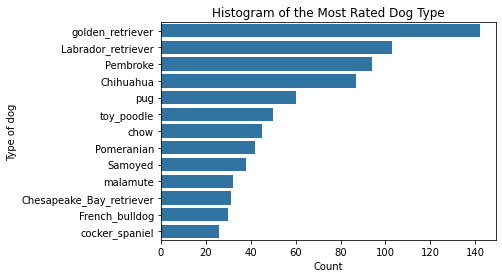

In [80]:
sns.countplot(data=df_dog_type,y='dog_type',order = order,color = color)
plt.xlabel("Count")
plt.ylabel('Type of dog')
plt.title('Histogram of the Most Rated Dog Type');

In [81]:
df = df_twitter.groupby('dog_type').mean()
df.head()

,tweet_id,rating_numerator,rating_denominator,day,month,year,rating,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,16.000000,6.00,2016.500000,8.000000,0.513621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airedale,7.184489e+17,9.833333,10.0,15.916667,8.75,2015.583333,9.833333,0.583771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,15.000000,5.25,2016.187500,10.312500,0.527359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appenzeller,7.939334e+17,11.000000,10.0,18.500000,4.50,2016.500000,11.000000,0.503665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australian_terrier,7.785921e+17,11.500000,10.0,7.000000,3.50,2016.500000,11.500000,0.307584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Highest rated dog type :  Bouvier_des_Flandres   
### Lowest rated dog type :  Japanese_spaniel               

In [82]:
df = df_twitter.groupby(['dog_type'])['rating'].mean()
df = df.sort_values(ascending=False)
df = df[:10]

In [83]:
df.head()

dog_type
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Irish_setter            12.333333
Border_terrier          12.142857
Name: rating, dtype: float64

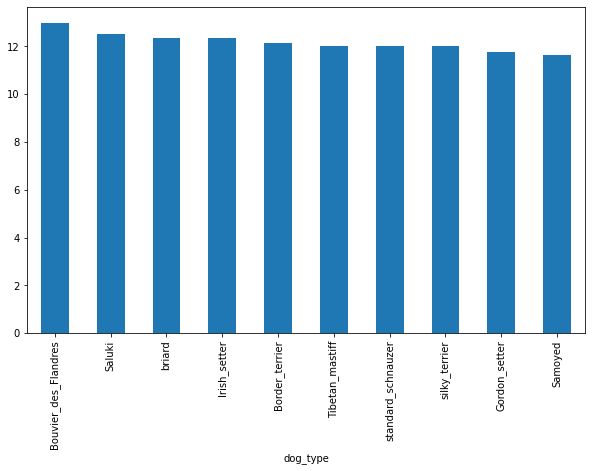

In [84]:
df.plot(kind='bar',color=color,figsize=(10,6))

In [85]:
df = df_twitter.groupby(['dog_type'])['rating'].mean()
df = df.sort_values(ascending=False)
df = df[-10:]

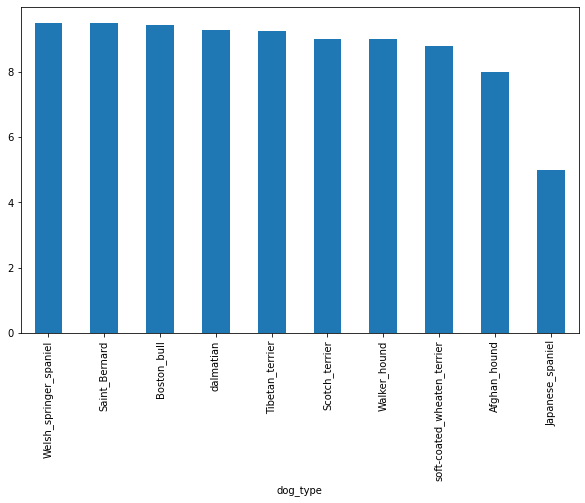

In [86]:
df.plot(kind='bar',color=color,figsize=(10,6))

### Most common dog names :  

In [87]:
df_twitter.name.value_counts()

None       404
a           46
Charlie     10
Lucy        10
Cooper      10
          ... 
Mookie       1
Dixie        1
Koko         1
Herb         1
Lolo         1
Name: name, Length: 828, dtype: int64

In [88]:
# Dropping irrelavent names.
df_twitter.drop(df_twitter[df_twitter['name'] == 'a'].index,inplace=True)

In [89]:
df_twitter.name.value_counts()

None       404
Charlie     10
Cooper      10
Lucy        10
Oliver       9
          ... 
Mookie       1
Dixie        1
Koko         1
Herb         1
Lolo         1
Name: name, Length: 827, dtype: int64

In [91]:
df_twitter.name.value_counts()[0:7].plot('barh', figsize=(10,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.

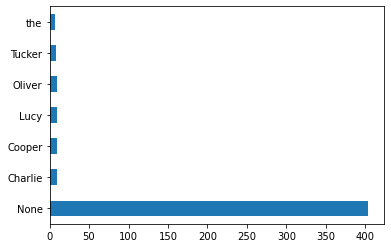

In [102]:
df_twitter.name.value_counts()[:7].plot(kind = 'barh')